## Loading the data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Price_History_ASX200.csv")
data.head()

,Date,Close Price,Open,High,Low,Vol.,Change %
0,21-Feb-07,5951.8,"5,981.50","5,991.80","5,951.00",623.69M,-0.63%
1,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
3,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
4,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%


In [3]:
data["Date"] = pd.to_datetime(data["Date"])
data.set_index("Date", inplace=True)
data.head()

,Close Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2007-02-21,5951.8,"5,981.50","5,991.80","5,951.00",623.69M,-0.63%
2007-02-22,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2007-02-23,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
2007-02-26,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
2007-02-27,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%


In [4]:
data = data["2012-03-20":"2021-03-19"]
data.head()

,Close Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2012-03-20,4275.0,"4,292.40","4,292.70","4,263.10",837.42M,-0.37%
2012-03-21,4254.3,"4,265.50","4,275.20","4,242.80",746.97M,-0.48%
2012-03-22,4273.7,"4,251.60","4,282.70","4,250.80",768.73M,0.46%
2012-03-23,4270.4,"4,262.30","4,277.80","4,238.40",809.95M,-0.08%
2012-03-26,4262.8,"4,269.70","4,289.80","4,262.80",643.86M,-0.18%


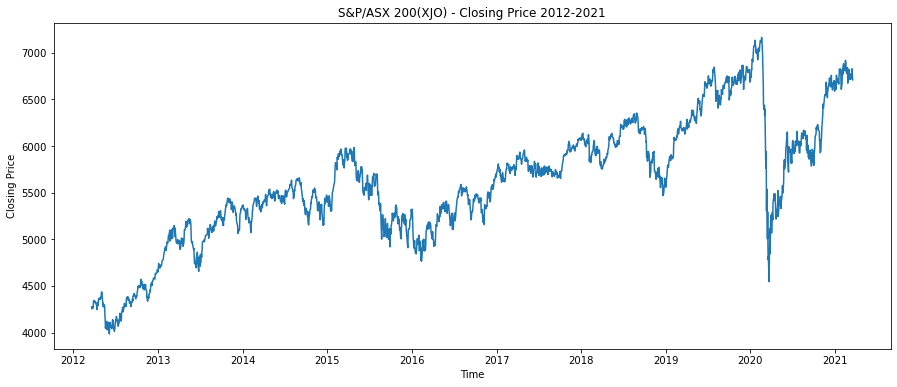

In [5]:
ts = data["Close Price"]
plt.figure(figsize=(15,6)) 
plt.title('S&P/ASX 200(XJO) - Closing Price 2012-2021')  
plt.xlabel('Time')                   
plt.ylabel('Closing Price')       
plt.plot(ts)
plt.savefig("plot.png")
plt.show()

## Symmetrically centered CMA-5, CMA-20, CMA-50, CMA-100

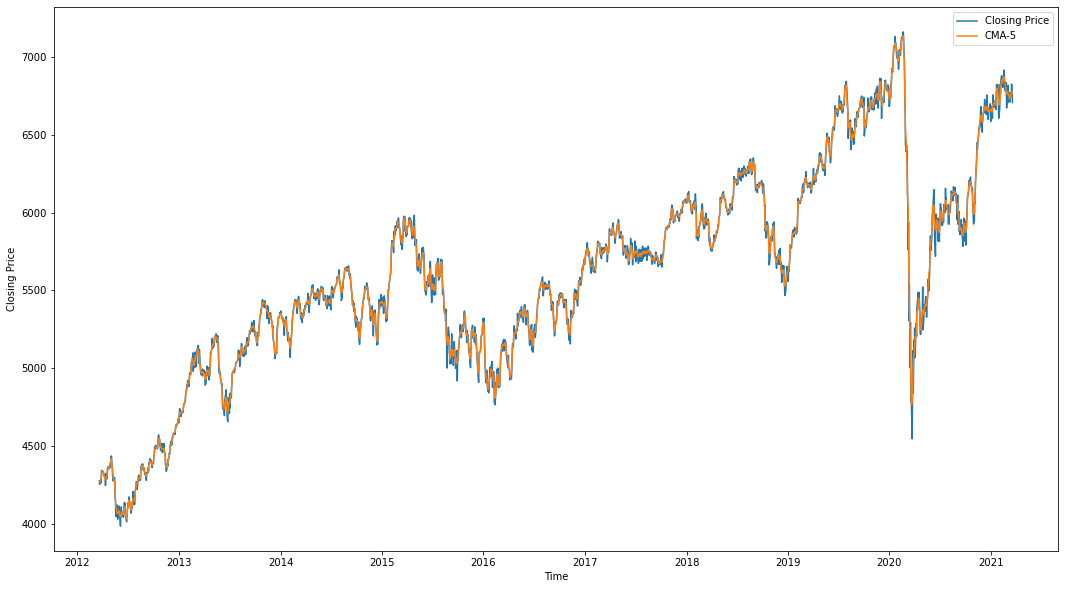

In [6]:
# Apply CMA with m=5 to initially estimate the trend
Trend1 = ts.rolling(5,center=True).mean()

plt.figure(figsize = (18,10))
plt.plot(ts,label='Closing Price')
plt.plot(Trend1, label='CMA-5')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig("CMA-5")
plt.show()

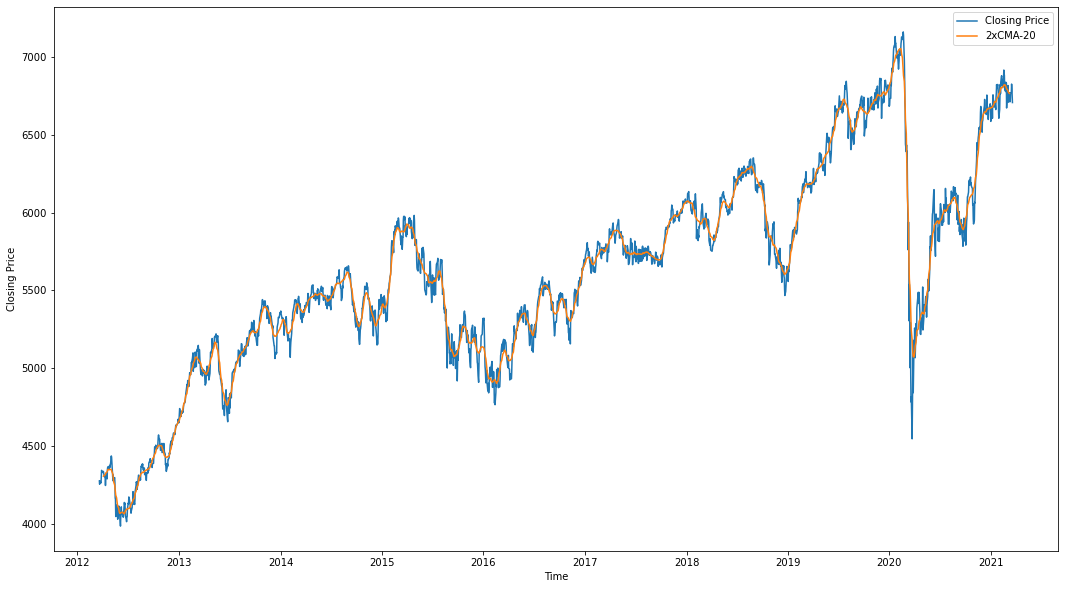

In [7]:
#Apply CMA with m=20 to initially estimate the trend
Trend2 = ts.rolling(20,center=True).mean().rolling(2,center=True).mean()

plt.figure(figsize = (18,10))
plt.plot(ts,label='Closing Price')
plt.plot(Trend2, label = "2xCMA-20")
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig("CMA-20")
plt.show()

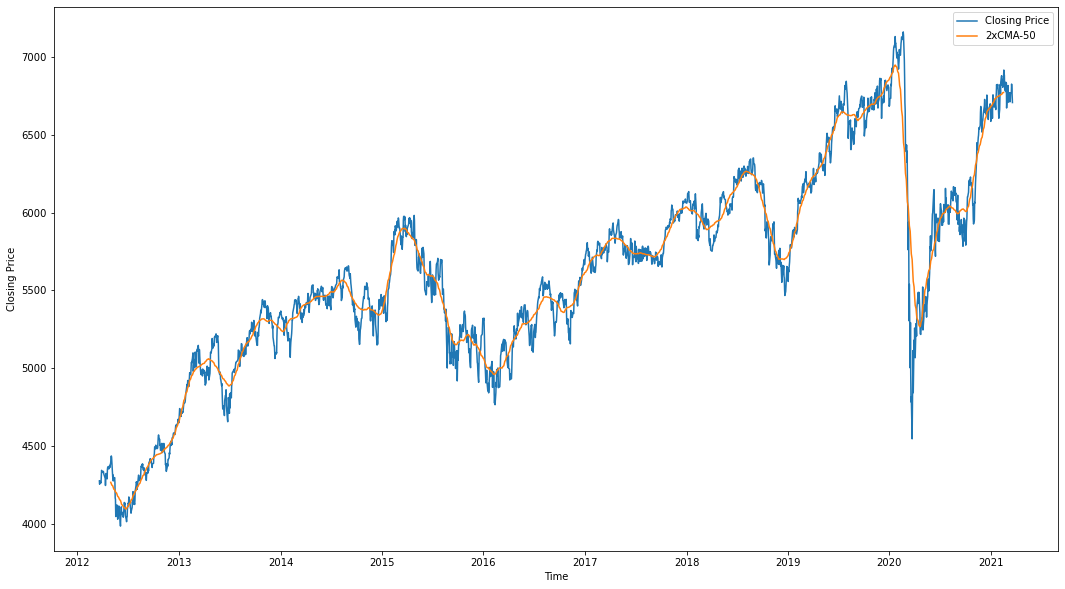

In [8]:
#Apply CMA with m=50 to initially estimate the trend
Trend3 = ts.rolling(50,center=True).mean().rolling(2,center=True).mean()

plt.figure(figsize = (18,10))
plt.plot(ts,label='Closing Price')
plt.plot(Trend3, label = "2xCMA-50")
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig("CMA-50")
plt.show()

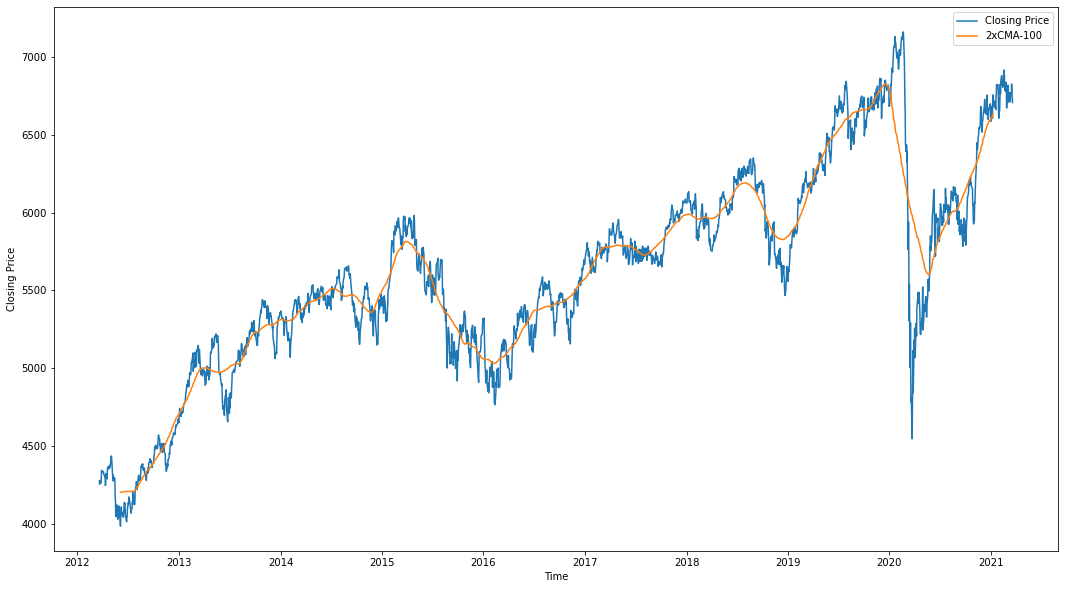

In [9]:
#Apply CMA with m=100 to initially estimate the trend
Trend4 = ts.rolling(100,center=True).mean().rolling(2,center=True).mean()

plt.figure(figsize = (18,10))
plt.plot(ts,label='Closing Price')
plt.plot(Trend4, label = "2xCMA-100")
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.savefig("CMA-100")
plt.show()

## Native Forecasting method with drift

In [10]:
print(data.shape)

(2327, 6)


In [11]:
data['Close Price']

Date
2012-03-20    4275.0
2012-03-21    4254.3
2012-03-22    4273.7
2012-03-23    4270.4
2012-03-26    4262.8
               ...  
2021-03-15    6773.0
2021-03-16    6827.1
2021-03-17    6795.2
2021-03-18    6745.9
2021-03-19    6708.2
Name: Close Price, Length: 2327, dtype: float64

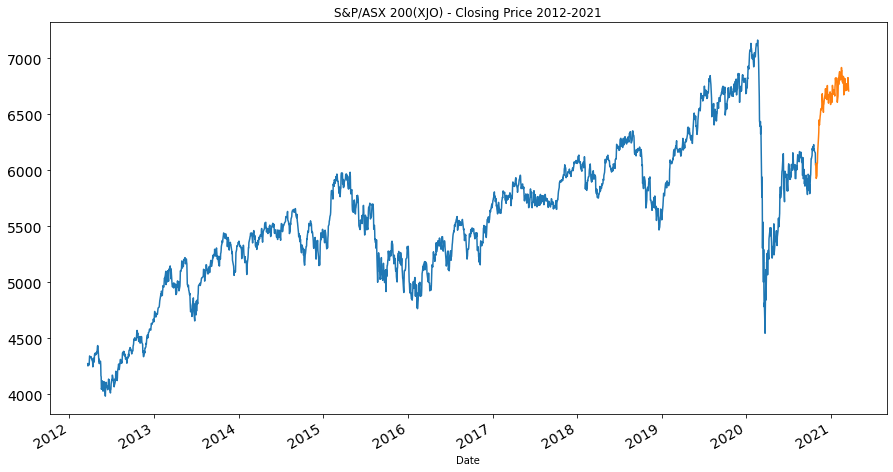

In [12]:
train = data[0:2228]
test = data[2228:]

#Plotting data
train["Close Price"].plot(figsize=(15,8), title= 'S&P/ASX 200(XJO) - Closing Price 2012-2021', fontsize=14)
test["Close Price"].plot(figsize=(15,8), title= 'S&P/ASX 200(XJO) - Closing Price 2012-2021', fontsize=14)
plt.show()

In [13]:
# Get the slope
y_t = train.iloc[len(train)-1]['Close Price'] 
m = (y_t - train.iloc[0]['Close Price']) / len(train)
y_hat_drift = test.copy().drop('Close Price', axis=1)
h = np.linspace(0,len(y_hat_drift)-1, len(y_hat_drift))
y_hat_drift['drift_forecast'] = y_t + m * h

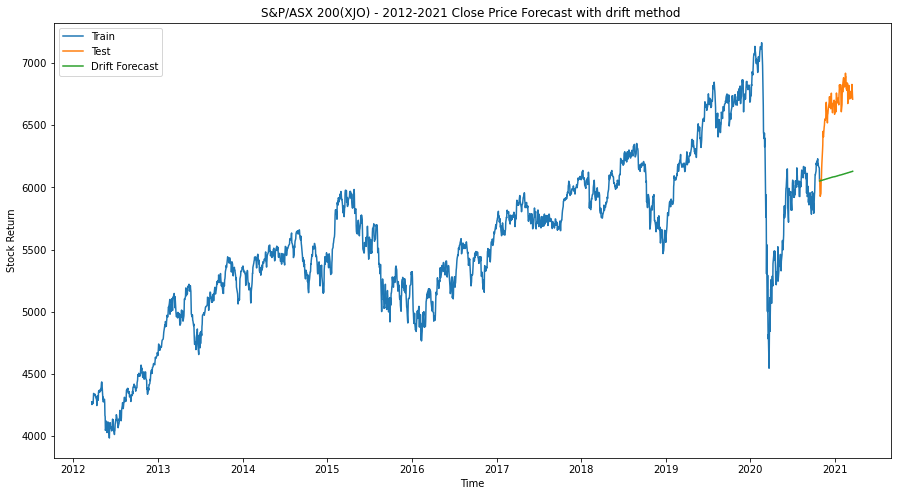

In [14]:
plt.figure(figsize=(15,8))
plt.plot(train.index, train['Close Price'], label='Train')
plt.plot(test.index, test['Close Price'], label='Test')
plt.plot(y_hat_drift.index, y_hat_drift['drift_forecast'], 
        label='Drift Forecast')
plt.xlabel('Time')                   
plt.ylabel('Stock Return')
plt.title('S&P/ASX 200(XJO) - 2012-2021 Close Price Forecast with drift method ') 
plt.legend(loc='best')
plt.savefig("Drift Forecast.png")
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test["Close Price"], y_hat_drift['drift_forecast']))
print('RMSE with naive drift approach : ', rms)

RMSE with naive drift approach :  586.6598789569117


In [16]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = test["Close Price"]
pred = y_hat_drift['drift_forecast']

print('MAPE with naive drift approach : ', mape(actual, pred))

MAPE with naive drift approach :  8.336140015591663


## Calculate for stock return

In [17]:
data1 = pd.read_csv("Price_History_ASX200.csv")
data1.head()

,Date,Close Price,Open,High,Low,Vol.,Change %
0,21-Feb-07,5951.8,"5,981.50","5,991.80","5,951.00",623.69M,-0.63%
1,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
3,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
4,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%


In [18]:
data1.tail()

,Date,Close Price,Open,High,Low,Vol.,Change %
3607,15-Mar-21,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%
3608,16-Mar-21,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%
3609,17-Mar-21,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%
3610,18-Mar-21,6745.9,"6,795.20","6,806.20","6,744.50",701.62M,-0.73%
3611,19-Mar-21,6708.2,"6,745.90","6,745.90","6,673.70",1.24B,-0.56%


In [19]:
len(data1)

3612

In [20]:
stock_return = []
for i in range (len(data1)-1):
    rt=np.log(data1.iloc[i+1]["Close Price"]/data1.iloc[i]["Close Price"])
    stock_return.append(rt)
print(stock_return)

[0.010911720862285687, 0.0031526923534812967, 0.0013079363790379514, -0.008340442772735716, -0.02727987672430938, -0.0038307312341826377, -0.004173787125321968, -0.023148696159435808, 0.020691479882140627, 0.009226509994848883, -0.0005151275913216735, 0.0013559324111357754, 0.010374457448239139, -0.004423280434111473, -0.02121231609287572, 0.019164184296520812, -0.0028573158977729675, 0.0040013733278759, 0.002879955638645818, -0.002504580258862671, 0.015874961058793085, -0.0005710446913658769, 0.006430567248921156, -0.0044333358545198456, -0.00689808748375728, 0.006344632991260617, 0.005704312091175582, -0.013299050828479804, 0.016363574728416725, 0.013839337026135, -0.0033020408998160385, 0.012412159252619933, -0.00026006957007554377, 0.001104828863927323, -0.0036440580425829805, 0.010037786473933587, -0.0018087568116623514, 0.008113765394189957, -0.011578906981165935, 0.006853881315267276, 0.00025771950596072845, -0.0033717050970698036, 0.003870847709254042, -0.00980288993469814, 0.0

In [21]:
stock_return= np.reshape(stock_return,(3611,1))
stock_return

array([[ 0.01091172],
       [ 0.00315269],
       [ 0.00130794],
       ...,
       [-0.00468351],
       [-0.00728157],
       [-0.00560425]])

In [22]:
dataset = pd.DataFrame({'Stock Return': stock_return[:, 0]})
print(dataset)

      Stock Return
0         0.010912
1         0.003153
2         0.001308
3        -0.008340
4        -0.027280
...            ...
3606      0.000916
3607      0.007956
3608     -0.004684
3609     -0.007282
3610     -0.005604

[3611 rows x 1 columns]


In [23]:
data1 = data1.drop(0)
data1

,Date,Close Price,Open,High,Low,Vol.,Change %
1,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
2,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
3,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
4,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%
5,28-Feb-07,5832.5,"5,992.60","5,992.60","5,786.80",920.10M,-2.69%
...,...,...,...,...,...,...,...
3607,15-Mar-21,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%
3608,16-Mar-21,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%
3609,17-Mar-21,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%
3610,18-Mar-21,6745.9,"6,795.20","6,806.20","6,744.50",701.62M,-0.73%


In [24]:
data1 = data1.reset_index(drop=True)
data1

,Date,Close Price,Open,High,Low,Vol.,Change %
0,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%
1,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%
2,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%
3,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%
4,28-Feb-07,5832.5,"5,992.60","5,992.60","5,786.80",920.10M,-2.69%
...,...,...,...,...,...,...,...
3606,15-Mar-21,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%
3607,16-Mar-21,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%
3608,17-Mar-21,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%
3609,18-Mar-21,6745.9,"6,795.20","6,806.20","6,744.50",701.62M,-0.73%


In [25]:
data1["Stock Return"] = dataset
data1

,Date,Close Price,Open,High,Low,Vol.,Change %,Stock Return
0,22-Feb-07,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%,0.010912
1,23-Feb-07,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%,0.003153
2,26-Feb-07,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%,0.001308
3,27-Feb-07,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%,-0.008340
4,28-Feb-07,5832.5,"5,992.60","5,992.60","5,786.80",920.10M,-2.69%,-0.027280
...,...,...,...,...,...,...,...,...
3606,15-Mar-21,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%,0.000916
3607,16-Mar-21,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%,0.007956
3608,17-Mar-21,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%,-0.004684
3609,18-Mar-21,6745.9,"6,795.20","6,806.20","6,744.50",701.62M,-0.73%,-0.007282


In [26]:
data1["Date"] = pd.to_datetime(data1["Date"])
data1.set_index("Date", inplace=True)
data1.head()

,Close Price,Open,High,Low,Vol.,Change %,Stock Return
Date,,,,,,,
2007-02-22,6017.1,"5,953.40","6,017.10","5,952.60",819.21M,1.10%,0.010912
2007-02-23,6036.1,"6,019.60","6,052.10","6,019.10",968.64M,0.32%,0.003153
2007-02-26,6044.0,"6,036.50","6,044.00","6,008.00",730.23M,0.13%,0.001308
2007-02-27,5993.8,"6,043.30","6,043.30","5,993.80",663.76M,-0.83%,-0.008340
2007-02-28,5832.5,"5,992.60","5,992.60","5,786.80",920.10M,-2.69%,-0.027280


In [27]:
data1 = data1["2012-03-20":"2021-03-19"]
data1.head(10)

,Close Price,Open,High,Low,Vol.,Change %,Stock Return
Date,,,,,,,
2012-03-20,4275.0,"4,292.40","4,292.70","4,263.10",837.42M,-0.37%,-0.003689
2012-03-21,4254.3,"4,265.50","4,275.20","4,242.80",746.97M,-0.48%,-0.004854
2012-03-22,4273.7,"4,251.60","4,282.70","4,250.80",768.73M,0.46%,0.004550
2012-03-23,4270.4,"4,262.30","4,277.80","4,238.40",809.95M,-0.08%,-0.000772
2012-03-26,4262.8,"4,269.70","4,289.80","4,262.80",643.86M,-0.18%,-0.001781
2012-03-27,4301.3,"4,273.50","4,308.40","4,273.40",861.84M,0.90%,0.008991
2012-03-28,4343.5,"4,297.80","4,346.90","4,294.80",877.90M,0.98%,0.009763
2012-03-29,4337.9,"4,339.40","4,351.10","4,328.70",894.49M,-0.13%,-0.001290
2012-03-30,4335.2,"4,340.30","4,361.10","4,335.20",1.13B,-0.06%,-0.000623


In [28]:
data1.tail()

,Close Price,Open,High,Low,Vol.,Change %,Stock Return
Date,,,,,,,
2021-03-15,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%,0.000916
2021-03-16,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%,0.007956
2021-03-17,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%,-0.004684
2021-03-18,6745.9,"6,795.20","6,806.20","6,744.50",701.62M,-0.73%,-0.007282
2021-03-19,6708.2,"6,745.90","6,745.90","6,673.70",1.24B,-0.56%,-0.005604


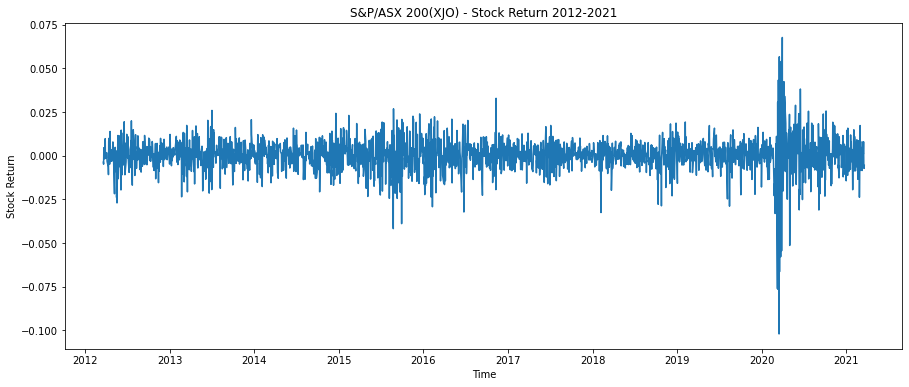

In [29]:
ts1 = data1["Stock Return"]
plt.figure(figsize=(15,6)) 
plt.title('S&P/ASX 200(XJO) - Stock Return 2012-2021')  
plt.xlabel('Time')                   
plt.ylabel('Stock Return')       
plt.plot(ts1)
plt.savefig("stock return.png")
plt.show()

In [30]:
print('The Max is : ',data1["Stock Return"].max())

The Max is :  0.06766482442989151


In [31]:
print('The Min is : ',data1["Stock Return"].min())

The Min is :  -0.10203030652983877


In [32]:
print('The sample mean is : ',data1["Stock Return"].mean())

The sample mean is :  0.0001920315697986504


In [33]:
from statistics import variance
print("Variance of Sample is % s " %(variance(data1["Stock Return"])))

Variance of Sample is 9.276576514150767e-05 


In [34]:
import scipy.stats as stats
from scipy.stats import kurtosis
from scipy.stats import skew
#calculate sample kurtosis
print('The sample kurtosis is : ', kurtosis(data1["Stock Return"], bias=False))
#calculate sample skewness
print('The sample skewness is : ', skew(data1["Stock Return"], bias=False))

The sample kurtosis is :  13.618606064024416
The sample skewness is :  -1.1206058538380061


## Forecasting for return set

In [35]:
# Use last 100 sample as the test set and previous as training set

train1 = data1[0:2228]
test1 = data1[2228:]


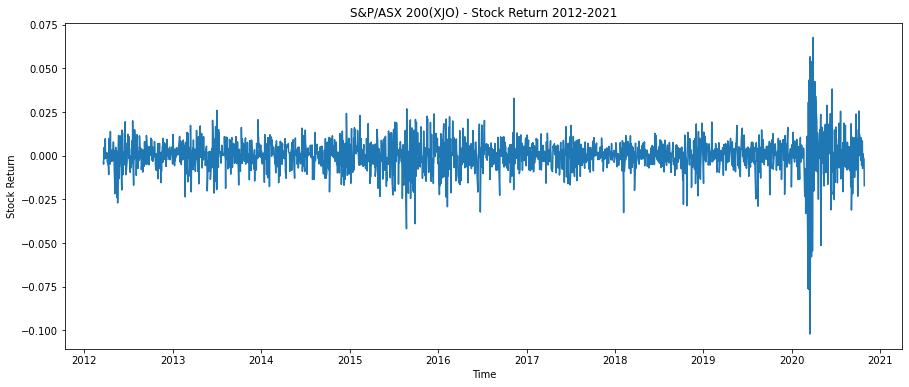

In [36]:
# Import some external libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For visualization
import numpy as np                 # For linear algebra
from sklearn.linear_model import LinearRegression # For Linear Regression

# Then read the data file into a DataFrame object
y = train1['Stock Return']

# Plot the time series
plt.figure(figsize=(15,6))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.title("S&P/ASX 200(XJO) - Stock Return 2012-2021")
plt.show()

In [37]:
smoothed1 = y.ewm(alpha=0.05, adjust=False).mean()
smoothed2 = y.ewm(alpha=0.1, adjust=False).mean()
smoothed3 = y.ewm(alpha=0.3, adjust=False).mean()
smoothed4 = y.ewm(alpha=0.7, adjust=False).mean()

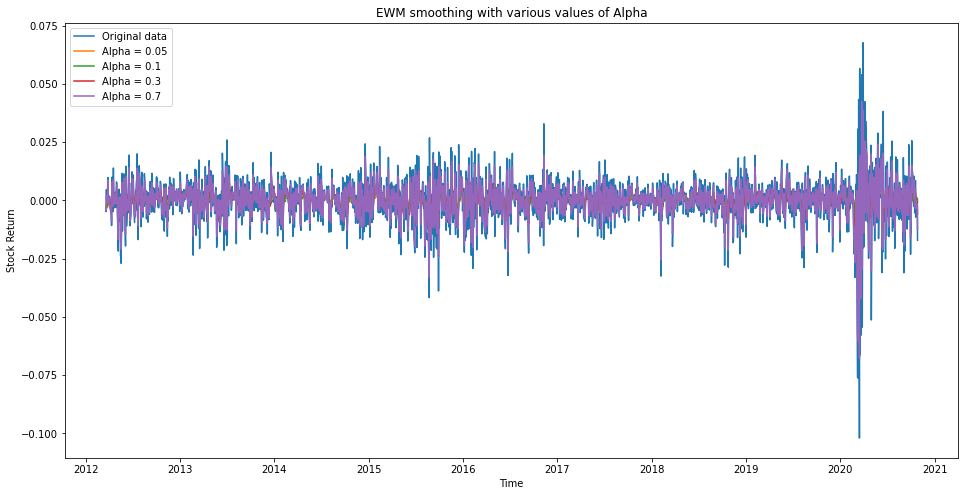

In [38]:
plt.figure(figsize=(16,8))
plt.plot(y, label='Original data')
plt.plot(smoothed1, label = "Alpha = 0.05")
plt.plot(smoothed2, label = "Alpha = 0.1")
plt.plot(smoothed3, label = "Alpha = 0.3")
plt.plot(smoothed4, label = "Alpha = 0.7")
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.title("EWM smoothing with various values of Alpha")
plt.legend()
plt.show()

In [39]:
def sse(x, y):
    return np.sum(np.power(x-y,2))

In [40]:
sse_one = []
alphas = np.arange(0.01,1,0.01)

for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean()
    sse_one.append(sse(smoothed[:-1], y.values[1:]))

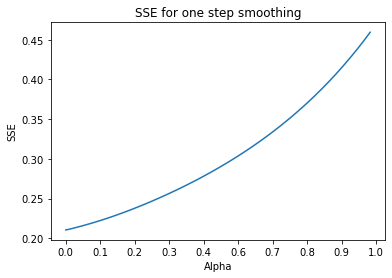

In [41]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.savefig("SSE.png")
plt.show()

In [42]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print("Optimal Alpha for 1-step forecast {:.2f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.01


## Forecasting

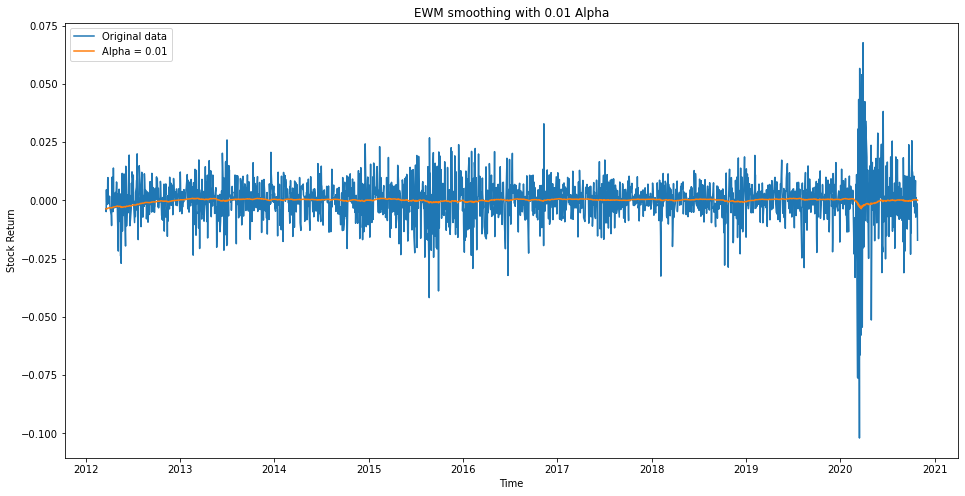

In [43]:
smoothed_final = y.ewm(alpha=0.01, adjust=False).mean()
plt.figure(figsize=(16,8))
plt.plot(y, label='Original data')
plt.plot(smoothed_final, label = "Alpha = 0.01")
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.title("EWM smoothing with 0.01 Alpha")
plt.legend()
plt.savefig("EWM-0.01.png")
plt.show()

In [44]:
y.loc["2016-03-22"]

0.0

In [45]:
def mape(actual, pred):    
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = y
pred = smoothed_final

print('MAPE with EWM smoothing forecast with 0.01 Alpha approach : ', mape(actual, pred))

MAPE with EWM smoothing forecast with 0.01 Alpha approach :  inf


<ipython-input-45-0d99069c7cc8>:3: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((actual - pred) / actual)) * 100


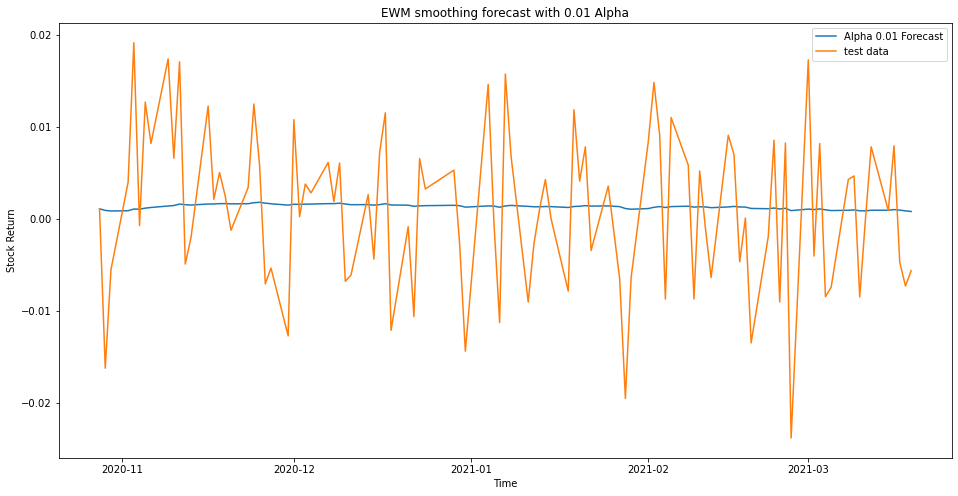

In [46]:
y_test = test1["Stock Return"]
smoothed_test = y_test.ewm(alpha=0.01, adjust=False).mean()

plt.figure(figsize=(16,8))
plt.plot(smoothed_test, label='Alpha 0.01 Forecast')
plt.plot(y_test, label = "test data")
plt.xlabel('Time')
plt.ylabel('Stock Return')
plt.title("EWM smoothing forecast with 0.01 Alpha")
plt.legend()
plt.savefig("EWM forecasting-0.01.png")
plt.show()

In [47]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = y_test
pred = smoothed_test

print('MAPE with EWM smoothing forecast with 0.01 Alpha approach : ', mape(actual, pred))

MAPE with EWM smoothing forecast with 0.01 Alpha approach :  237.17277090081575


## Squared return dataset

In [48]:
data1["Squared Stock Return"] = data1["Stock Return"]**2

<ipython-input-48-9e18d22c7995>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Squared Stock Return"] = data1["Stock Return"]**2


In [49]:
data1

,Close Price,Open,High,Low,Vol.,Change %,Stock Return,Squared Stock Return
Date,,,,,,,,
2012-03-20,4275.0,"4,292.40","4,292.70","4,263.10",837.42M,-0.37%,-0.003689,1.360941e-05
2012-03-21,4254.3,"4,265.50","4,275.20","4,242.80",746.97M,-0.48%,-0.004854,2.356002e-05
2012-03-22,4273.7,"4,251.60","4,282.70","4,250.80",768.73M,0.46%,0.004550,2.070001e-05
2012-03-23,4270.4,"4,262.30","4,277.80","4,238.40",809.95M,-0.08%,-0.000772,5.966989e-07
2012-03-26,4262.8,"4,269.70","4,289.80","4,262.80",643.86M,-0.18%,-0.001781,3.172952e-06
...,...,...,...,...,...,...,...,...
2021-03-15,6773.0,"6,766.80","6,793.50","6,727.50",480.30M,0.09%,0.000916,8.387237e-07
2021-03-16,6827.1,"6,773.00","6,858.90","6,767.80",586.89M,0.80%,0.007956,6.329580e-05
2021-03-17,6795.2,"6,827.10","6,827.10","6,761.40",603.10M,-0.47%,-0.004684,2.193522e-05


In [50]:
train1 = data1[0:2228]
test1 = data1[2228:]

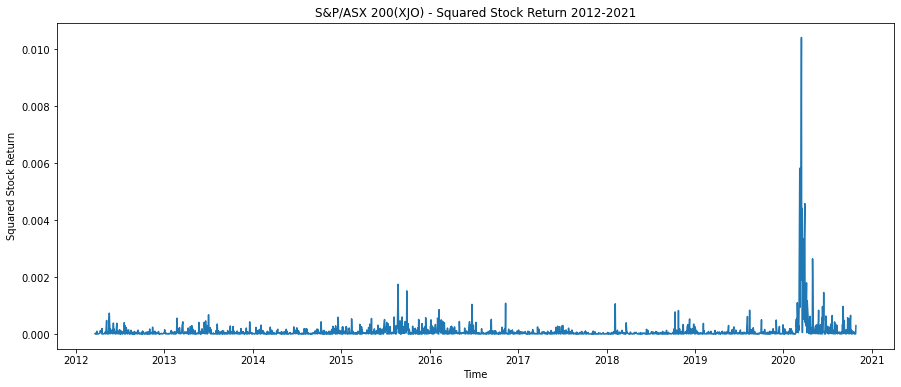

In [51]:
# Import some external libraries
import pandas as pd                # For data manipulation
import matplotlib.pyplot as plt    # For visualization
import numpy as np                 # For linear algebra
from sklearn.linear_model import LinearRegression # For Linear Regression

# Then read the data file into a DataFrame object
y = train1['Squared Stock Return']

# Plot the time series
plt.figure(figsize=(15,6))
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Squared Stock Return')
plt.title("S&P/ASX 200(XJO) - Squared Stock Return 2012-2021")
plt.savefig("Squared stock return.png")
plt.show()

In [52]:
smoothed1 = y.ewm(alpha=0.05, adjust=False).mean()
smoothed2 = y.ewm(alpha=0.1, adjust=False).mean()
smoothed3 = y.ewm(alpha=0.3, adjust=False).mean()
smoothed4 = y.ewm(alpha=0.7, adjust=False).mean()

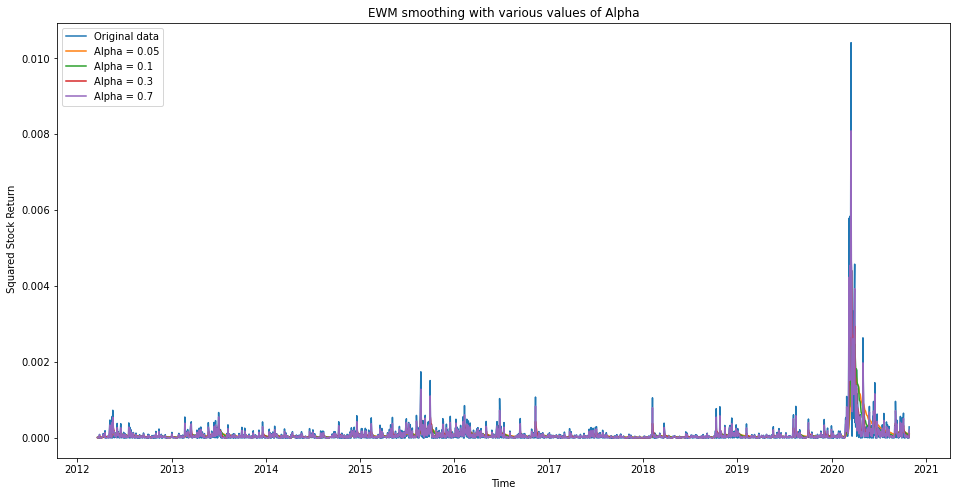

In [53]:
plt.figure(figsize=(16,8))
plt.plot(y, label='Original data')
plt.plot(smoothed1, label = "Alpha = 0.05")
plt.plot(smoothed2, label = "Alpha = 0.1")
plt.plot(smoothed3, label = "Alpha = 0.3")
plt.plot(smoothed4, label = "Alpha = 0.7")
plt.xlabel('Time')
plt.ylabel(' Squared Stock Return')
plt.title("EWM smoothing with various values of Alpha")
plt.legend()
plt.show()

In [54]:
def sse(x, y):
    return np.sum(np.power(x-y,2))

In [55]:
sse_one = []
alphas = np.arange(0.01,1,0.01)

for i in alphas:
    smoothed = y.ewm(alpha = i, adjust=False).mean()
    sse_one.append(sse(smoothed[:-1], y.values[1:]))

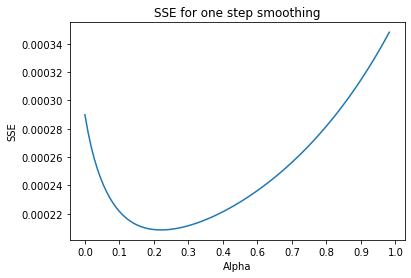

In [56]:
plt.figure()
plt.plot(sse_one)
plt.title("SSE for one step smoothing")
plt.ylabel("SSE")
plt.xlabel("Alpha")
plt.xticks(np.linspace(0, 100, 10), ["{0:1.1f}".format(x) for x in np.linspace(0,1,10)])
plt.savefig("SSE Sqaured stock return.png")
plt.show()

In [57]:
optimal_alpha_one = alphas[np.argmin(sse_one)]
print("Optimal Alpha for 1-step forecast {:.2f}".format(optimal_alpha_one))

Optimal Alpha for 1-step forecast 0.26


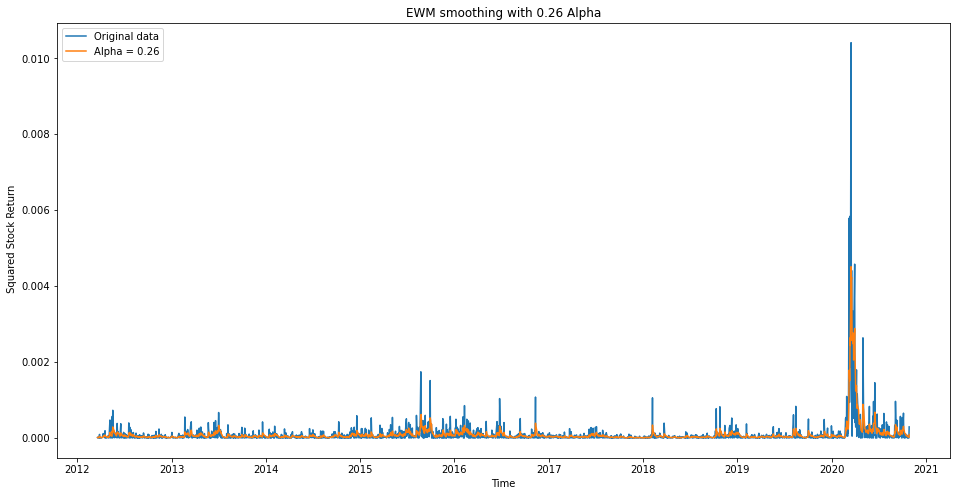

In [58]:
smoothed_final = y.ewm(alpha=0.26, adjust=False).mean()
plt.figure(figsize=(16,8))
plt.plot(y, label='Original data')
plt.plot(smoothed_final, label = "Alpha = 0.26")
plt.xlabel('Time')
plt.ylabel(' Squared Stock Return')
plt.title("EWM smoothing with 0.26 Alpha")
plt.legend()
plt.savefig("Squared stock return with 0.26 Alpha.png")
plt.show()

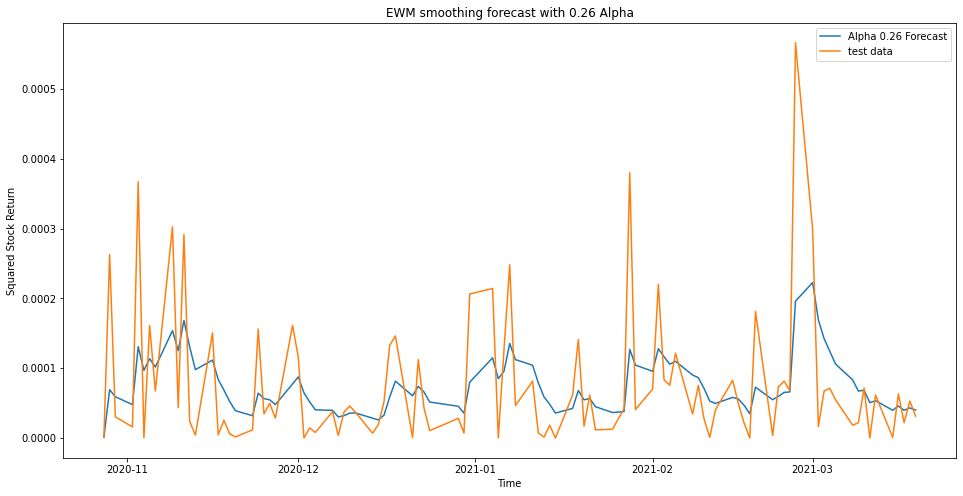

In [59]:
y_test = test1["Squared Stock Return"]
smoothed_test = y_test.ewm(alpha=0.26, adjust=False).mean()

plt.figure(figsize=(16,8))
plt.plot(smoothed_test, label='Alpha 0.26 Forecast')
plt.plot(y_test, label = "test data")
plt.xlabel('Time')
plt.ylabel('Squared Stock Return')
plt.title("EWM smoothing forecast with 0.26 Alpha")
plt.legend()
plt.savefig("Squared stock return Forcasting with 0.26 Alpha.png")
plt.show()

In [60]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = y_test
pred = smoothed_test

print('MAPE with EWM smoothing forecast with 0.26 Alpha approach : ', mape(actual, pred))

MAPE with EWM smoothing forecast with 0.26 Alpha approach :  226207.6313540089
